# Notebook Overview 
### 1. Problem Statement
### 2. Importing Libraries
### 3. Loading Dataset
### 4. Pre processing for Exploratory Data Analysis (EDA)
### 5. EDA


# 1. Problem Statement

<h3> Build a model using the ‘data.csv’ with the goal of predicting if an individual has heart disease. </h3>

# 2. Importing Libraries 

In [ ]:
#Data processing 
import pandas as pd
import numpy as np
from scipy import stats
#Data Visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

# 3. Load Dataset

In [4]:
df = pd.read_csv('heart_data.csv')
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,ecg,max_heart_rate,exercise_induced_chest_pain,st_depression,st_slope,stained_blood_vessels,blood_disorder,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


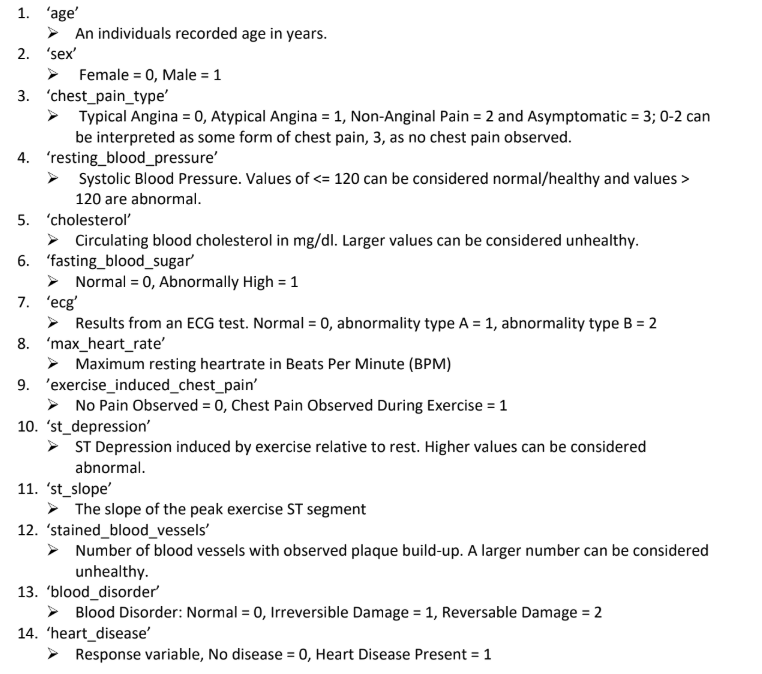

# 4. Preprocessing  Data for EDA 

In [43]:
df.dtypes

age                              int64
sex                              int64
chest_pain_type                  int64
resting_blood_pressure           int64
cholesterol                      int64
fasting_blood_sugar              int64
ecg                              int64
max_heart_rate                   int64
exercise_induced_chest_pain      int64
st_depression                  float64
st_slope                         int64
stained_blood_vessels            int64
blood_disorder                   int64
heart_disease                    int64
dtype: object

In [44]:
#Converting features to categorical names for better interpretation 
#chestpaintype
df['chest_pain_type'][df['chest_pain_type'] == 0] = 'Typical_angina'
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'Atypical_angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'Non-anginal_pain'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'Asymptomatic'
#ecg 
df['ecg'][df['ecg'] == 0] = 'Normal'
df['ecg'][df['ecg'] == 1] = 'Abnormality_type_A'
df['ecg'][df['ecg'] == 2] = 'Abnormality_type_B'
#St_Slope find a paper to support the types 
df['st_slope'][df['st_slope'] == 0] = 'slope 1'
df['st_slope'][df['st_slope'] == 1] = 'slope 2'
df['st_slope'][df['st_slope'] == 2] = 'slope 3'
#Sex 
df['sex'] = df.sex.apply(lambda x: 'male' if x == 1 else 'female')
#Blood disorder 
df['blood_disorder'][df['blood_disorder'] == 0] = 'Normal'
df['blood_disorder'][df['blood_disorder'] == 1] = 'Irreversible_Damage'
df['blood_disorder'][df['blood_disorder'] == 2] = 'Reversible_Damage'
df['blood_disorder'][df['blood_disorder'] == 3] = 'Unkown_Type'
#exercise induced angina 
df['exercise_induced_chest_pain'][df['exercise_induced_chest_pain'] == 0] = 'No_Pain_Observed'
df['exercise_induced_chest_pain'][df['exercise_induced_chest_pain'] == 1] = 'Pain_Observed'

In [51]:
print(f'Chest pain types in the dataset:', df['chest_pain_type'].value_counts())
print(f'Blood Disorder types in the dataset:', df['blood_disorder'].value_counts())
print(f'ST_Slope types in the dataset', df['st_slope'].value_counts())
print(f'ECG types in the dataset:', df['ecg'].value_counts())
print(f'Exercise induced chest pain types in the dataset:', df['exercise_induced_chest_pain'].value_counts())

Chest pain types in the dataset: chest_pain_type
Typical_angina      497
Non-anginal_pain    284
Atypical_angina     167
Asymptomatic         77
Name: count, dtype: int64
Blood Disorder types in the dataset: blood_disorder
Reversible_Damage      544
Unkown_Type            410
Irreversible_Damage     64
Normal                   7
Name: count, dtype: int64
ST_Slope types in the dataset st_slope
slope 2    482
slope 3    469
slope 1     74
Name: count, dtype: int64
ECG types in the dataset: ecg
Abnormality_type_A    513
Normal                497
Abnormality_type_B     15
Name: count, dtype: int64
Exercise induced chest pain types in the dataset: exercise_induced_chest_pain
No_Pain_Observed    680
Pain_Observed       345
Name: count, dtype: int64


In [52]:
#checking missing values
df.isna().sum()

age                            0
sex                            0
chest_pain_type                0
resting_blood_pressure         0
cholesterol                    0
fasting_blood_sugar            0
ecg                            0
max_heart_rate                 0
exercise_induced_chest_pain    0
st_depression                  0
st_slope                       0
stained_blood_vessels          0
blood_disorder                 0
heart_disease                  0
dtype: int64

<h3> There are no missing values in the dataset </h3>

## 5. EDA

In [15]:
df.describe(include = [np.number])

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate,st_depression,stained_blood_vessels,heart_disease
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,0.149268,149.114146,1.071512,0.754146,0.513171
std,9.072290,17.516718,51.59251,0.356527,23.005724,1.175053,1.030798,0.500070
min,29.000000,94.000000,126.00000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,0.000000,132.000000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,0.000000,152.000000,0.800000,0.000000,1.000000
75%,61.000000,140.000000,275.00000,0.000000,166.000000,1.800000,1.000000,1.000000
max,77.000000,200.000000,564.00000,1.000000,202.000000,6.200000,4.000000,1.000000


In [51]:
df.describe(include= [np.object_])

,sex,chest_pain_type,ecg,st_slope,blood_disorder
count,1025,1025,1025,1025,1025
unique,2,4,3,3,4
top,male,Typical_angina,Abnormality_type_A,slope 2,Reversible_Damage
freq,713,497,513,482,544


In [16]:
#distribution of people with heart diseaase/ without 
disease_counts = df['heart_disease'].value_counts()
print(disease_counts)

heart_disease
1    526
0    499
Name: count, dtype: int64


<h3> The dataset is fairly balanced with 526 people having heart disease, and 499 with no heart disease  </h3>

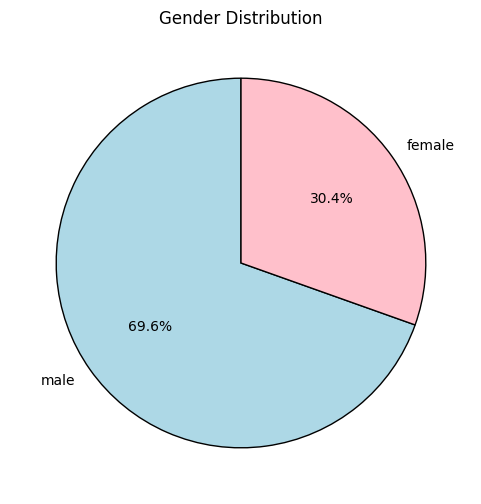

In [ ]:
#distribution of sex 
gender_counts = df['sex'].value_counts(normalize=True) * 100
#Pie Chart for Gender Distribution
plt.figure(figsize=(6, 6))
df['sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'pink'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Gender Distribution")
plt.ylabel("") 
plt.show()


<h3> The pie chart shows the proportion of males vs. females in the dataset. ~69.6% of the data are male (light blue) and ~30.4% are female (pink). </h3>


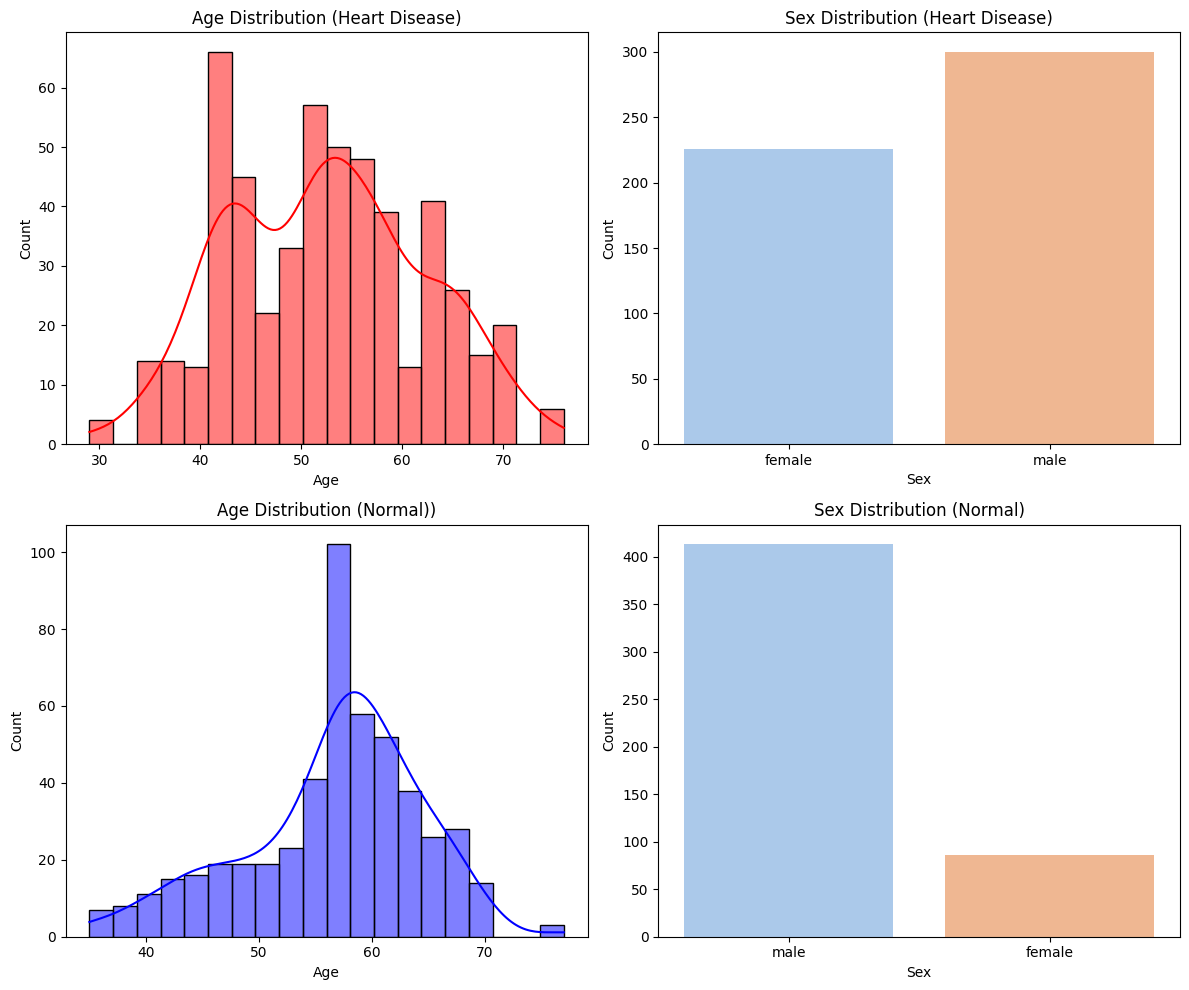

In [ ]:
# checking differences in gender distribution by heart disease 
no_heart_disease = df[df['heart_disease'] == 0]
heart_disease = df[df['heart_disease'] == 1]
#Plot to check how gender varies in people detected with heart disease and without 
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# Age Distribution for Heart Disease Patients
sns.histplot(heart_disease['age'], bins=20, kde=True, color='red', ax=axes[0, 0])
axes[0, 0].set_title("Age Distribution (Heart Disease)")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Count")
# Gender Distribution for Heart Disease Patients
sns.countplot(x='sex', data=heart_disease, palette="pastel", ax=axes[0, 1])
axes[0, 1].set_title("Sex Distribution (Heart Disease)")
axes[0, 1].set_xlabel("Sex")
axes[0, 1].set_ylabel("Count")
# Age Distribution for Non-Heart Disease Patients
sns.histplot(no_heart_disease['age'], bins=20, kde=True, color='blue', ax=axes[1, 0])
axes[1, 0].set_title("Age Distribution (Normal))")
axes[1, 0].set_xlabel("Age")
axes[1, 0].set_ylabel("Count")
# Gender Distribution for Non-Heart Disease Patients
sns.countplot(x='sex', data=no_heart_disease, palette="pastel", ax=axes[1, 1])
axes[1, 1].set_title("Sex Distribution (Normal)")
axes[1, 1].set_xlabel("Sex")
axes[1, 1].set_ylabel("Count")
# Adjust layout
plt.tight_layout()
plt.show()

<h3> Age Factor: Heart disease affects a broad age range but peaks in the 40s-50s, while those without heart disease are slightly older (~55-60 years old).
Gender Disparity:
More males are affected by heart disease than females.
Even in the non-heart disease group, males are the majority, meaning the dataset is male-dominated.
The proportion of females is lower in both groups, but relatively lower in the non-heart disease group, suggesting that women may have a protective factor against heart disease or are underrepresented. </h3>

In [ ]:
# Function to plot comparative plots and crosstab for categorical variables 
def plot_and_crosstab(
    df, 
    no_heart_disease, 
    heart_disease, 
    column, 
    palette_no_hd='pastel', 
    palette_hd='muted'
):
    #Create the figure with two subplots 
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # Countplot for No Heart Disease 
    sns.countplot(
        y=column, 
        data=no_heart_disease, 
        palette=palette_no_hd, 
        order=df[column].value_counts().index,
        ax=axes[0]
    )
    axes[0].set_title(f"{column.replace('_',' ').title()} Distribution (No Heart Disease)", fontsize=14)
    axes[0].set_xlabel("Count", fontsize=12)
    axes[0].set_ylabel(column.replace('_',' ').title(), fontsize=12)

    #Countplot for Heart Disease 
    sns.countplot(
        y=column, 
        data=heart_disease, 
        palette=palette_hd, 
        order=df[column].value_counts().index,
        ax=axes[1]
    )
    axes[1].set_title(f"{column.replace('_',' ').title()} Distribution (Heart Disease)", fontsize=14)
    axes[1].set_xlabel("Count", fontsize=12)
    axes[1].set_ylabel("")

    #  Adjust layout & show plots
    plt.tight_layout()
    plt.show()

    # Create & return styled crosstab
    crosstab_df = round(
        pd.crosstab(df[column], df['heart_disease'], normalize='columns') * 100, 2
    )
    styled_crosstab = crosstab_df.style.background_gradient(cmap="Reds")
    return styled_crosstab


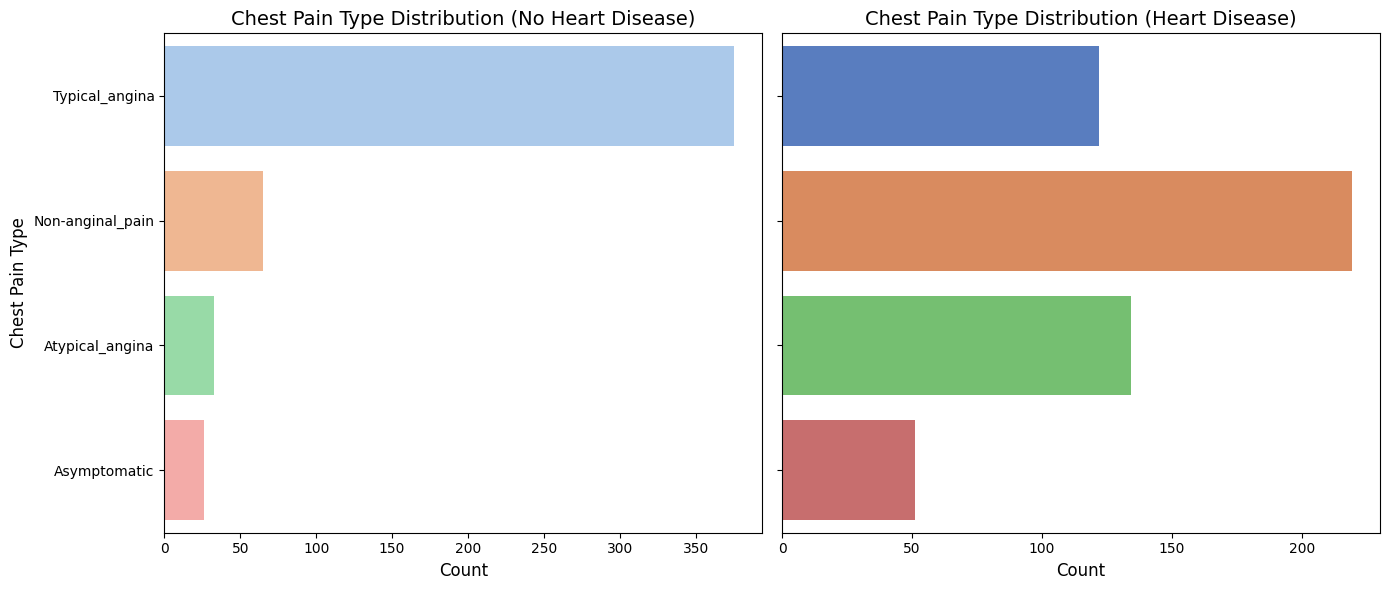

heart_disease,0,1
chest_pain_type,,
Asymptomatic,5.210000,9.700000
Atypical_angina,6.610000,25.480000
Non-anginal_pain,13.030000,41.630000
Typical_angina,75.150000,23.190000


In [ ]:
# For chest pain type
styled_chest_pain = plot_and_crosstab(
    df=df,
    no_heart_disease=no_heart_disease,
    heart_disease=heart_disease,
    column='chest_pain_type'
)
styled_chest_pain 


<h3> 75.15% of people without heart disease have Typical Angina, while only 23.19% of heart disease patients have it.
41.63% of heart disease patients experience Non-anginal pain, compared to 13.03% of non-heart disease patients.
Atypical Angina and Asymptomatic cases are more frequent in heart disease patients.
Since it's the most common type in the dataset, it naturally appears more frequently in both heart disease and no-heart-disease groups. </h3>

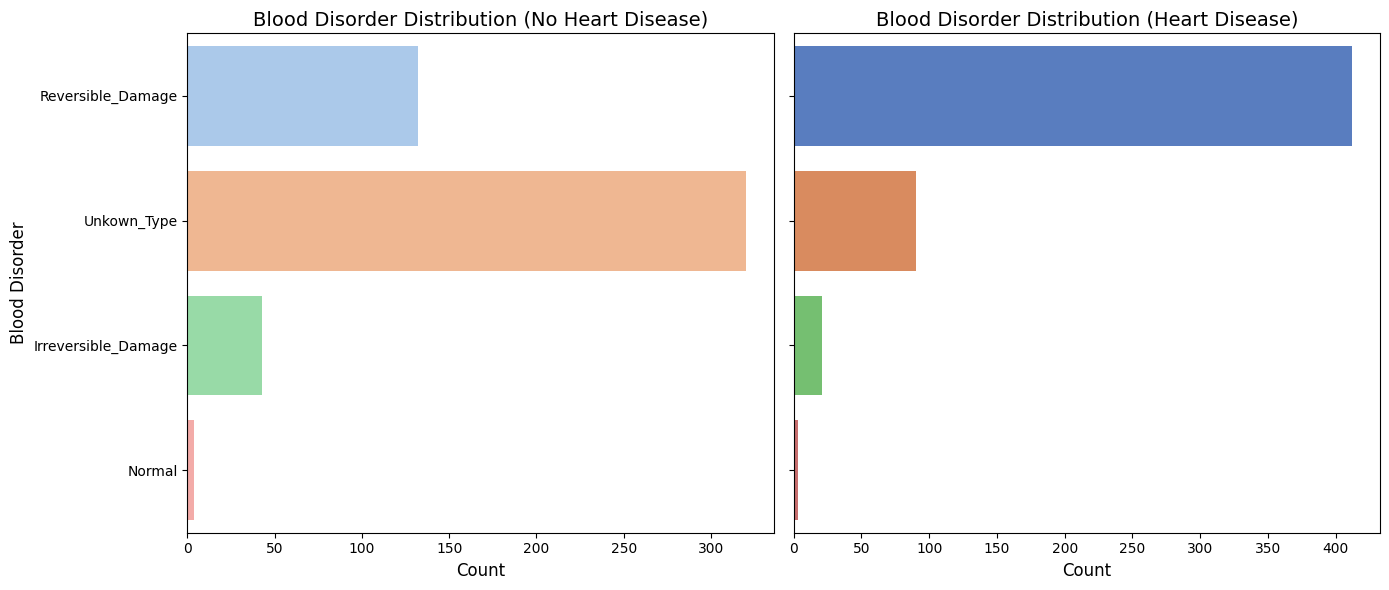

heart_disease,0,1
blood_disorder,,
Irreversible_Damage,8.620000,3.990000
Normal,0.800000,0.570000
Reversible_Damage,26.450000,78.330000
Unkown_Type,64.130000,17.110000


In [33]:
# For blood disorder
styled_blood_disorder = plot_and_crosstab(
    df=df,
    no_heart_disease=no_heart_disease,
    heart_disease=heart_disease,
    column='blood_disorder'
)
styled_blood_disorder



<h3> "Reversible Damage" is much more prevalent in heart disease patients (right plot) compared to those without heart disease (left plot).
"Unknown Type" is significantly more frequent in patients without heart disease.
"Irreversible Damage" appears at a lower but comparable rate in both groups.
There are very few "Normal" cases, suggesting most patients have some form of blood disorder. </h3>

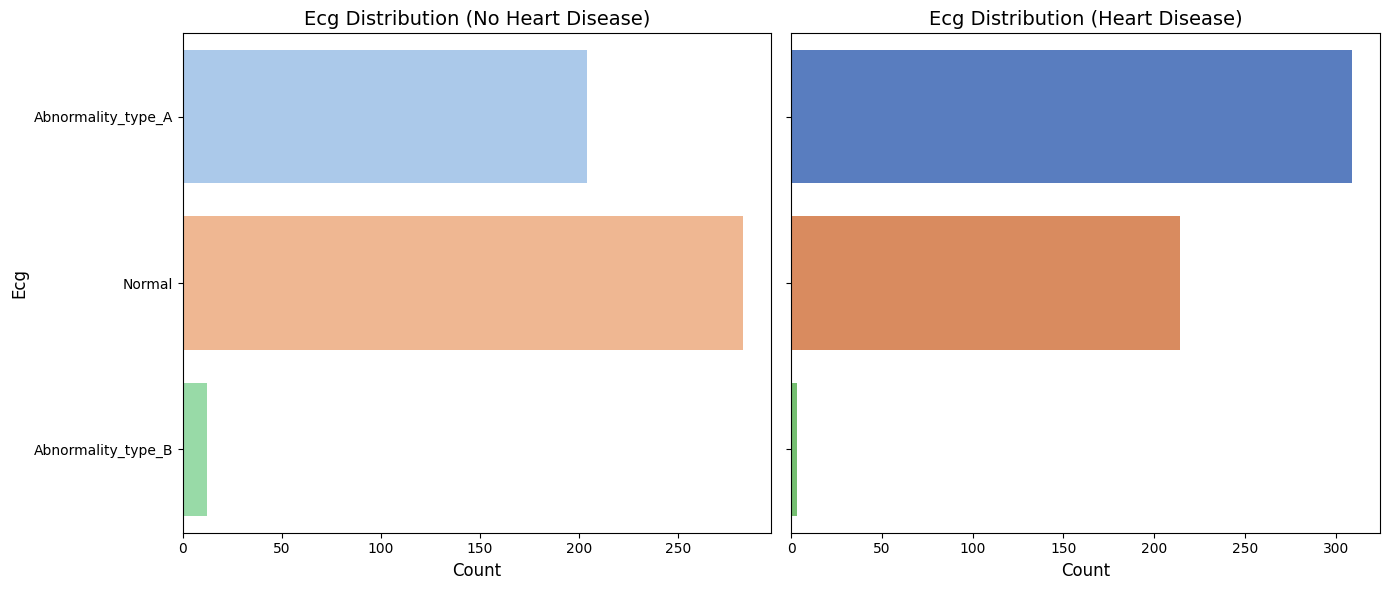

heart_disease,0,1
ecg,,
Abnormality_type_A,40.880000,58.750000
Abnormality_type_B,2.400000,0.570000
Normal,56.710000,40.680000


In [35]:
# For ECG
styled_ecg = plot_and_crosstab(
    df=df,
    no_heart_disease=no_heart_disease,
    heart_disease=heart_disease,
    column='ecg'
)
styled_ecg


<h3> Abnormality Type A is more common in heart disease patients (58.75%) than in non-heart disease patients (40.88%), suggesting a potential correlation with heart disease.
Normal ECG readings are more frequent in non-heart disease patients (56.71%) but still present in 40.68% of heart disease cases, indicating that a normal ECG alone does not rule out heart disease.
Abnormality Type B is rare in both groups but slightly more frequent in non-heart disease patients (2.4%), making it less relevant as a distinguishing factor. </he>

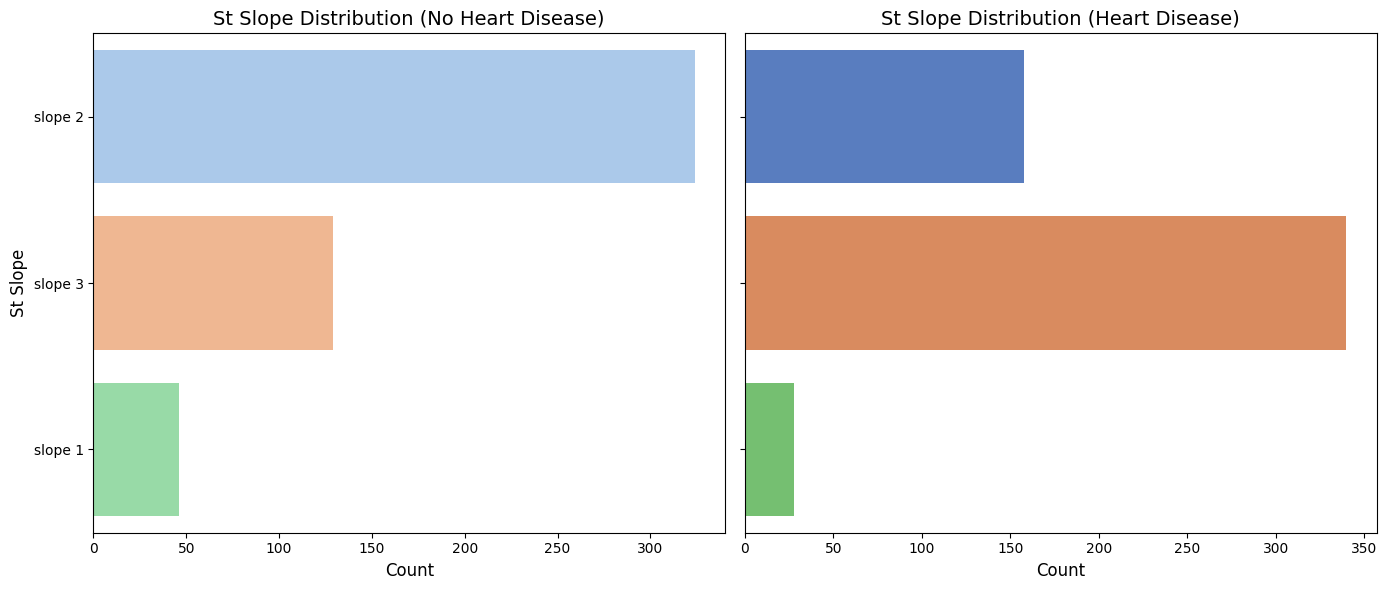

heart_disease,0,1
st_slope,,
slope 1,9.220000,5.320000
slope 2,64.930000,30.040000
slope 3,25.850000,64.640000


In [36]:
# For ST SLOPE
styled_st_slope = plot_and_crosstab(
    df=df,
    no_heart_disease=no_heart_disease,
    heart_disease=heart_disease,
    column='st_slope'
)
styled_st_slope


<h3> Slope 3 is prevalent in patients with heart disease and slope 2 in patients with no heart disease in this dataset.</h3>

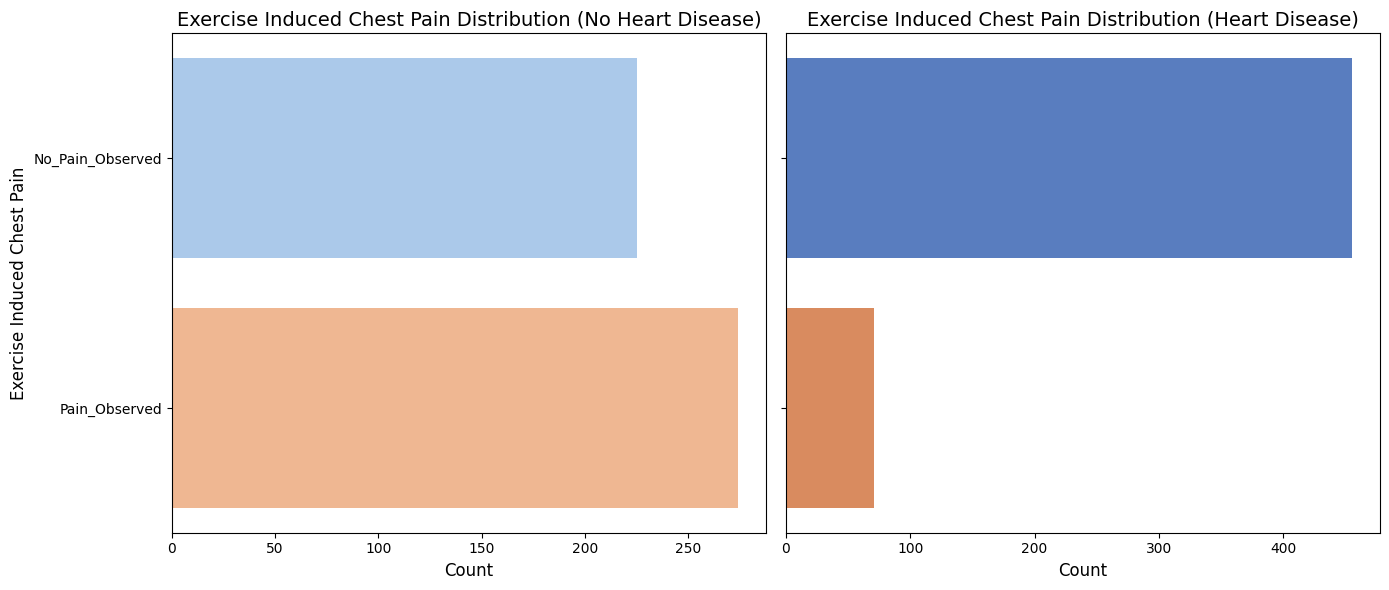

heart_disease,0,1
exercise_induced_chest_pain,,
No_Pain_Observed,45.090000,86.500000
Pain_Observed,54.910000,13.500000


In [ ]:
# For Exercise Induced Chest Pain
styled_exercise_angina = plot_and_crosstab(
    df=df,
    no_heart_disease=no_heart_disease,
    heart_disease=heart_disease,
    column='exercise_induced_chest_pain'
)
styled_exercise_angina


<h3> 86% individuals with heart disease are reported to not have any exercise induced chest pain. </h3>

Distribution of numerical variables 


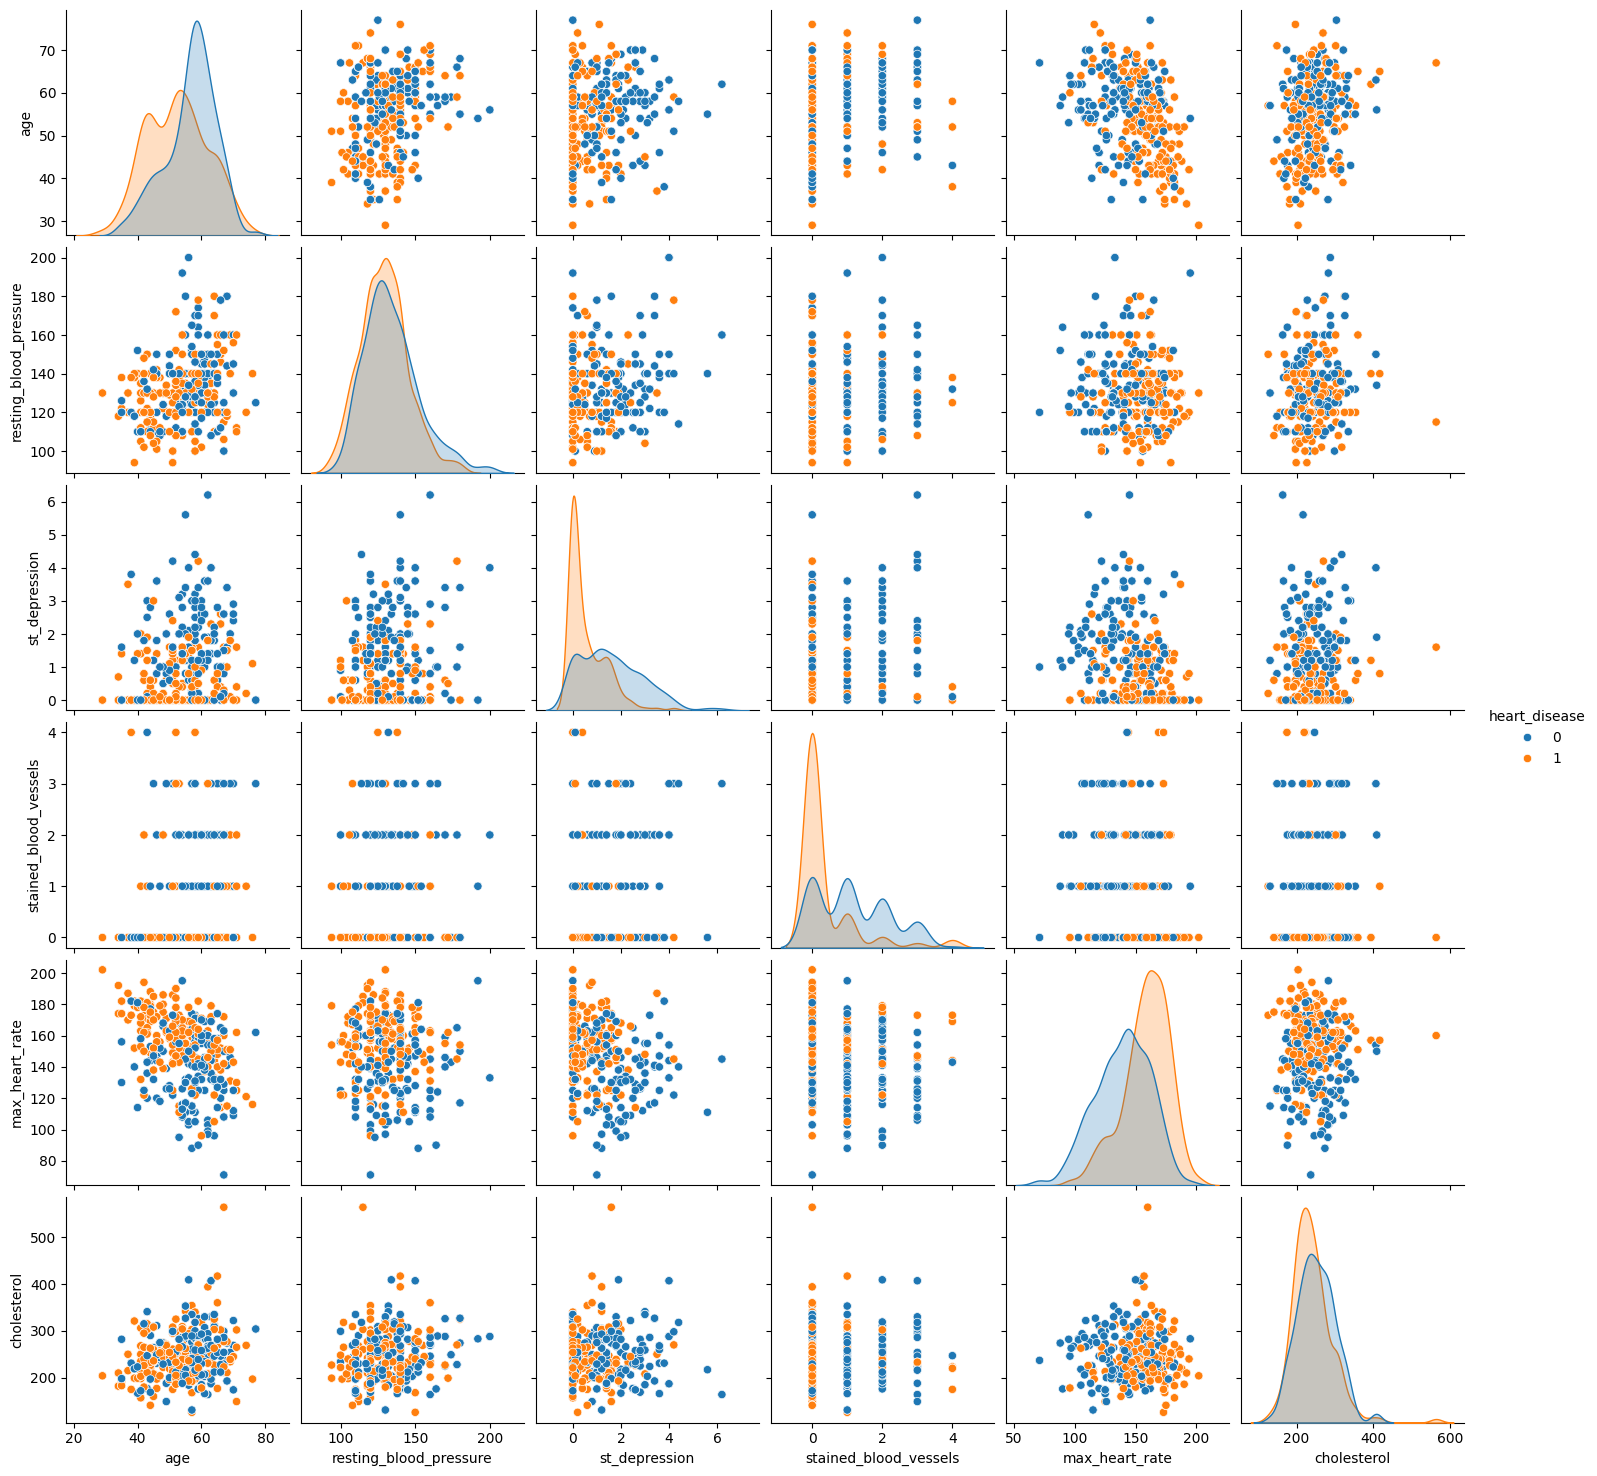

In [39]:
sns.pairplot(df, hue = 'heart_disease', vars = ['age', 'resting_blood_pressure', 'st_depression', 'stained_blood_vessels', 'max_heart_rate', 'cholesterol'])

<h3> 1. Feature Distributions (Diagonals)
The diagonal plots show historgrams revealing how each feature is distributed across heart disease and non-heart disease groups.
Max Heart Rate & ST Depression show distinct distribution differences:
Heart disease patients (orange) tend to have lower max heart rate.
ST Depression is higher in heart disease cases, indicating a strong correlation.
2. Bivariate Relationships (Scatterplots)
The off-diagonal scatterplots highlight feature relationships and how they differ by heart disease status.
a) Age vs. Max Heart Rate
Negative correlation: Older individuals tend to have a lower max heart rate.
The orange dots (heart disease cases) are mostly clustered in lower max heart rate values, suggesting a potential link.
b) Cholesterol vs. Resting Blood Pressure
Weak or no clear separation between heart disease and non-heart disease patients.
Cholesterol alone may not be a strong predictor.
c) ST Depression vs. Age
Higher ST depression levels (≥2) are more common in heart disease patients.
This suggests ST depression could be an important predictor.
d) ST Depression vs. Stained Blood Vessels
Patients with higher stained blood vessels and high ST depression are more likely to have heart disease.
A clear separation between classes is visible.
3. Outliers & Patterns
Some cholesterol values exceed 500, which could indicate potential outliers. </h3>



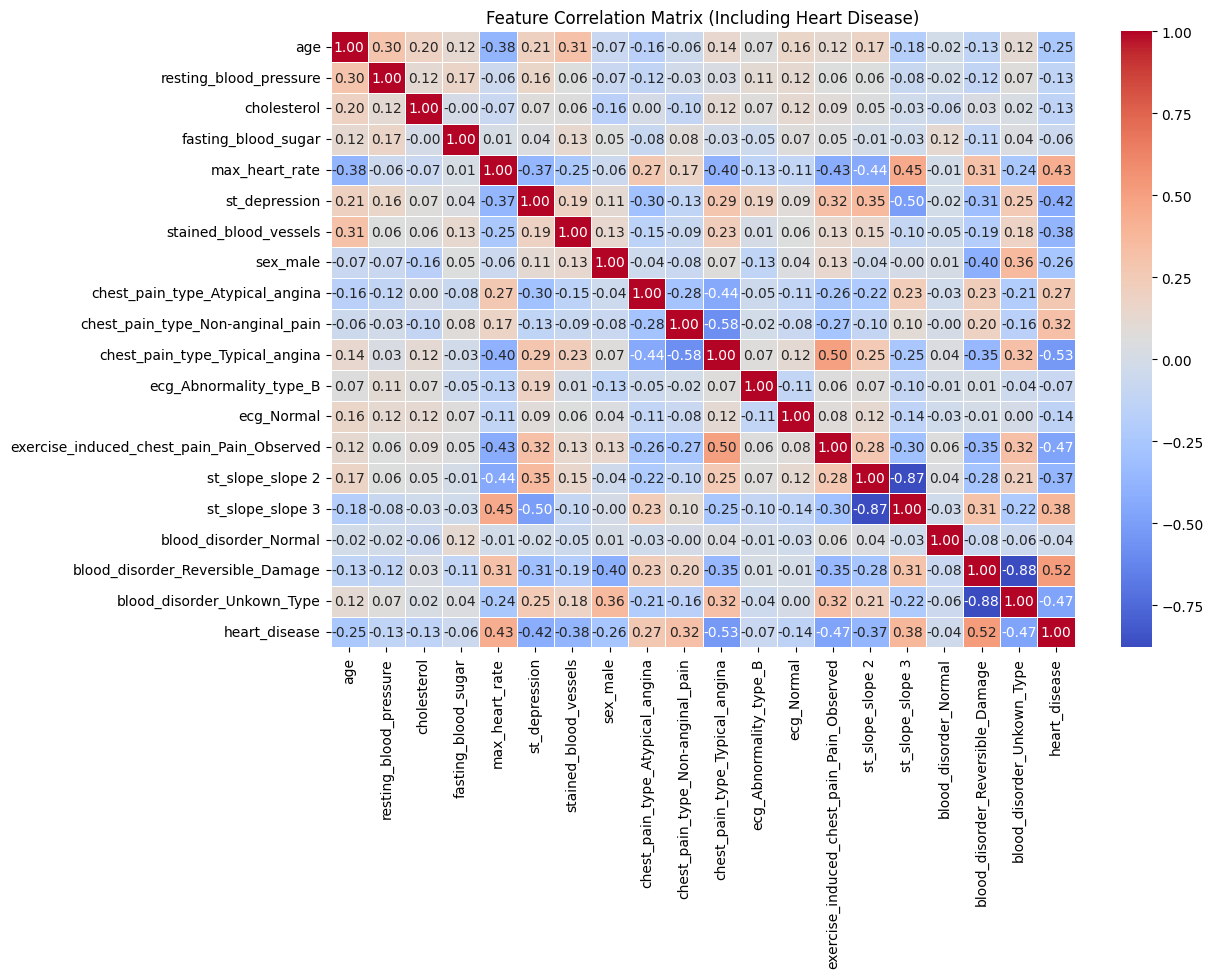

<h3> ST Depression (st_depression): 0.42 → Moderate positive correlation
ST Slope 3 (st_slope_slope 3): 0.47 → Moderate positive correlation
Chest Pain Type (chest_pain_type_Typical_angina): -0.53 → Strong negative correlation
Exercise Induced Chest Pain (exercise_induced_chest_pain_Pain_Observed): -0.47 → Strong negative correlation
Blood Disorder (blood_disorder_Reversible_Damage): 0.52 → Strong positive correlation
Typical Angina (chest_pain_type_Typical_angina): -0.53
This suggests that patients with typical angina are less likely to have heart disease.
Exercise Induced Chest Pain (exercise_induced_chest_pain_Pain_Observed): -0.47
Indicates that those experiencing pain during exercise are less likely to have heart disease.
Positive Correlations with Heart Disease
Max Heart Rate & ST Slope 3 also show a correlation (0.45). </h3>
